## 1차원 데이터
- 평균값(기댓값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며 그 경향을 없애기 위한 것이 불편분산임. 표본분산 보다 조금 큰 값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
  - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
  - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
  - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
  - 통계학에서는 이 비편향분산을 사용하는 경우가 많다.
  - 불편분산은 n대신 n-1로 나누어 구할 수 있다.

[표분분산이 분산을 과소 평가하는 이유]

- 호수안에 물고기가 7마리가 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링1 3마리{1,2,3} 표본평균 2, 샘플링2 {5,6,7} 표본평균 6
- 이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.

#### 0822 [과제] 교제 p.51 코드 문제 풀기

In [2]:
import numpy as np
import pandas as pd

# 소수점 이하 3자리 제한
%precision 3

df = pd.read_csv('ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [2]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [3]:
scores_df = pd.DataFrame({'scores':scores}, 
                         index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], 
                                       name='student'))
scores_df

,scores
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### 평균값

In [4]:
print(sum(scores)/len(scores))
print(np.mean(scores))
scores_df.mean()

55.0
55.0


scores    55.0
dtype: float64

### 중앙값

In [5]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [6]:
# if 짝수 -> n/2 와 (n/2)+1 의 평균값
# else 홀수 -> (n+1)/2 데이터가 중앙값

n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0+m1)/2
else:
    median = sorted_scores[(n+1)//2 - 1]
median

56.500

In [7]:
print(np.median(scores))
scores_df.median()

56.5


scores    56.5
dtype: float64

### 최빈값

In [8]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [9]:
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

### 편차

In [10]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [11]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [13]:
# 표준 편차의 평균은 0
print(np.mean(deviation))
np.mean(another_deviation)

0.0


0.000

In [14]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,scores,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [15]:
summary_df.mean()

scores       55.0
deviation     0.0
dtype: float64

### 분산

In [17]:
# 양수, 음수 상관없이 모두 평균에서 10 만큼 떨어져 있음. 그래서 제곱 이용
# numpy는 표본분산 사용
print(np.mean(deviation ** 2))
print(np.var(scores))

# pandas는 불편분산 사용
scores_df.var()

86.0
86.0


scores    95.555556
dtype: float64

In [18]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,scores,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [19]:
summary_df.mean()

scores                 55.0
deviation               0.0
square of deviation    86.0
dtype: float64

### 표준편차

In [20]:
np.sqrt(np.var(scores, ddof=0))

9.274

In [21]:
np.std(scores, ddof=0)

9.274

### 범위 / 사분위 범위

In [22]:
# 범위
np.max(scores) - np.min(scores)

28

In [23]:
# 사분위 범위
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

### 데이터의 지표 정리

In [24]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

#### 0822 [과제] 20개 원소로 구성되는 배열을 만든 후, 평균, 편차 및 편차의 합을 구하세요.

In [7]:
np.random.seed(0)
array = np.random.randint(1, 300, 20)
print(f'array : {array}')
print(f'mean : {array.mean()}')

array : [173  48 118 193 252 196  10 212 278 243 293  88  71  89 194  40  88 175
  89 166]
mean : 150.8


In [8]:
deviation = array - np.mean(array)
deviation

array([  22.2, -102.8,  -32.8,   42.2,  101.2,   45.2, -140.8,   61.2,
        127.2,   92.2,  142.2,  -62.8,  -79.8,  -61.8,   43.2, -110.8,
        -62.8,   24.2,  -61.8,   15.2])

In [9]:
deviation.sum()

-0.000

#### 0822 [과제] 중앙값 > 평균값 인 경우와 중앙값 < 평균값인 두가지 집합에서 나타나는 가능성 있는 특징을 사례로 설명하세요.

#### 0822 [과제]  4분위를 이용하여 이상치를 구하는 사례를 생성하고 시각화 및 이상치 산출하는 과정을 설명하세요.

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# 소수점 이하 3자리 제한
%precision 3

df = pd.read_csv('ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [32]:
df.describe()

,english,mathematics
count,50.000000,50.000000
mean,58.380000,78.880000
std,9.799813,8.414371
min,37.000000,57.000000
25%,54.000000,76.000000
50%,57.500000,80.000000
75%,65.000000,84.000000
max,79.000000,94.000000


In [34]:
df_Q1 = df.quantile(0.25)
df_Q3 = df.quantile(0.75)
df_IQR = df_Q3 - df_Q1
df_IQR

english        11.0
mathematics     8.0
dtype: float64

In [ ]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

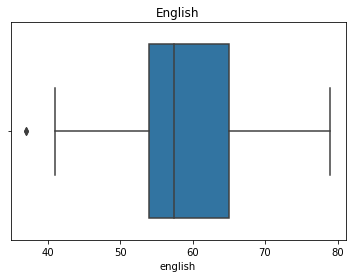

In [40]:
sns.boxplot(x="english", data=df)
plt.title("English")
plt.show()

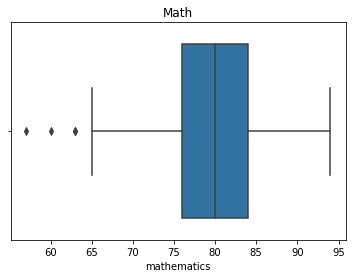

In [41]:
sns.boxplot(x="mathematics", data=df)
plt.title("Math")
plt.show()

#### 0822 [과제] 표본 분산과 불편 분산의 차이를 사례를 들어 설명하세요.

##### 표본분산 : NumPy / 불편분산 : Pandas

- 표본분산 : 분산을 과소 추정함
- 불편분산 : 분산을 과소 추정하지 않음. ** 총 len에서 -1 해줌(자유도)

In [13]:
np.random.seed(1)
variance = np.random.randint(1, 50, 10)
print(variance)
print(variance.mean())

[38 44 13  9 10 12  6 16  1 17]
16.6


In [28]:
print(f'표본분산 : {np.var(variance)}')
print(f'불편분산 : {variance.var(ddof=1)}') # ddof=1 자유도 주기

표본분산 : 170.04000000000002
불편분산 : 188.93333333333334


In [24]:
ar = np.array([40, 70, 67, 132, 183, 23, 99, 300, 200, 100])
np.var(ar)

6485.240

In [27]:
ar.var(ddof=1)

7205.822